
  (1) Add a new food
  (2) Visualize progress
  (q) quit
  
Choose an option: 1
Adding a new food!
Name: choco
Calories: 1000
Proteins: 20
Fats: 30
Carbs: 100
Successfully Added!

  (1) Add a new food
  (2) Visualize progress
  (q) quit
  
Choose an option: dal
Invalid Choice!

  (1) Add a new food
  (2) Visualize progress
  (q) quit
  
Choose an option: 400
Invalid Choice!

  (1) Add a new food
  (2) Visualize progress
  (q) quit
  
Choose an option: 1
Adding a new food!
Name: dal
Calories: 400
Proteins: 20
Fats: 40
Carbs: 100
Successfully Added!

  (1) Add a new food
  (2) Visualize progress
  (q) quit
  
Choose an option: 1
Adding a new food!
Name: roti
Calories: 905
Proteins: 55
Fats: 10
Carbs: 170
Successfully Added!

  (1) Add a new food
  (2) Visualize progress
  (q) quit
  
Choose an option: 2


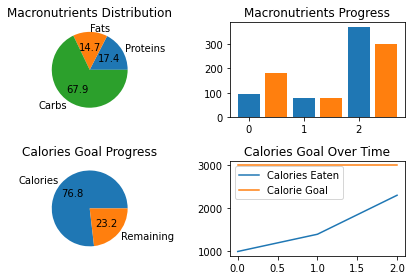


  (1) Add a new food
  (2) Visualize progress
  (q) quit
  


KeyboardInterrupt: ignored

Choose an option: q


In [22]:
from dataclasses import dataclass

import numpy as np
import matplotlib.pyplot as plt

CALORIE_GOAL_LIMIT = 3000 #kcal
PROTEIN_GOAL = 180 #grams
FAT_GOAL = 80 #grams
CARBS_GOAL = 300 #grams

today=[]
@dataclass
class Food:
  name: str
  calories:int
  protein:int
  fat:int
  carbs:int

done=False

while not done:
  print("""
  (1) Add a new food
  (2) Visualize progress
  (q) quit
  """)

  choice=input("Choose an option: ")
  if choice =="1":
    print("Adding a new food!")
    name=input("Name: ")
    calories=int(input("Calories: "))
    proteins=int(input("Proteins: "))
    fats=int(input("Fats: "))
    carbs=int(input("Carbs: "))
    food=Food(name, calories, proteins, fats , carbs)
    today.append(food)
    print("Successfully Added!")
  elif choice=="2":
    calories_sum=sum(food.calories for food in today)
    protein_sum=sum(food.protein for food in today)
    fats_sum=sum(food.fat for food in today)
    carbs_sum=sum(food.carbs for food in today)

    fig, axs=plt.subplots(2,2)
    axs[0, 0].pie([protein_sum, fats_sum, carbs_sum], labels=["Proteins", "Fats", "Carbs"], autopct="%1.1f")
    axs[0, 0].set_title("Macronutrients Distribution")
    axs[0, 1].bar([0, 1, 2], [protein_sum, fats_sum, carbs_sum], width=0.4)
    axs[0, 1].bar([0.5, 1.5, 2.5], [PROTEIN_GOAL, FAT_GOAL, CARBS_GOAL], width=0.4)
    axs[0, 1].set_title("Macronutrients Progress")
    axs[1, 0].pie([calories_sum, CALORIE_GOAL_LIMIT - calories_sum], labels=["Calories", "Remaining"], autopct="%1.1f")
    axs[1, 0].set_title("Calories Goal Progress")
    axs[1, 1].plot(list(range(len(today))), np.cumsum([food.calories for food in today]), label="Calories Eaten")
    axs[1, 1].plot(list(range(len(today))), [CALORIE_GOAL_LIMIT]*len(today), label="Calorie Goal")
    axs[1, 1].legend()
    axs[1, 1].set_title("Calories Goal Over Time")
    fig.tight_layout()
    plt.show()
  elif choice=="q":
       done=True
  else:
      print("Invalid Choice!")